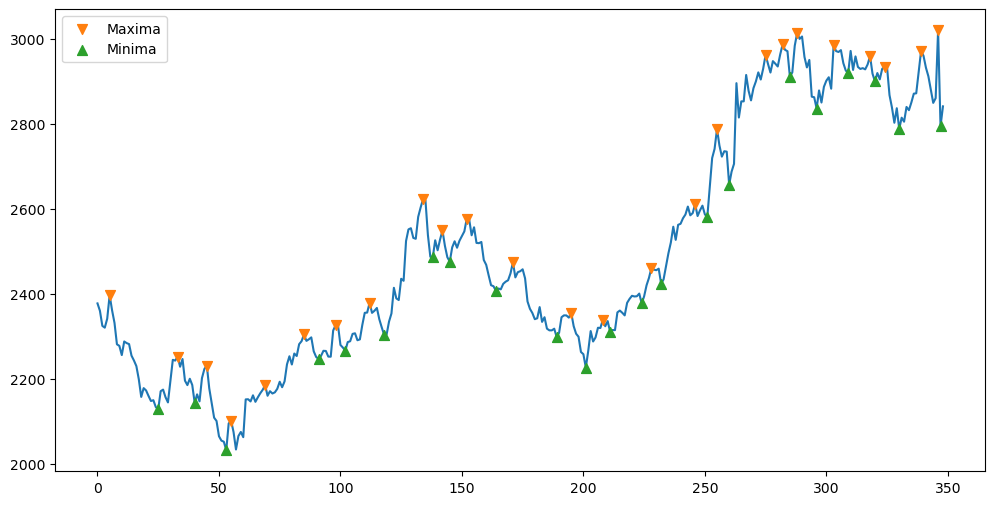

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from scipy.signal import argrelextrema

# Download historical data for a specific stock (e.g., RELIANCE.NS)
ticker = 'RELIANCE.NS'
# data = yf.download(ticker,start='2023-01-01', end='2024-6-6',interval='1h')
data = pd.read_csv("D_RELIANCE1.csv")


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


order = 5
max_idx = argrelextrema(data['Close'].values, np.greater, order=order)[0]
min_idx = argrelextrema(data['Close'].values, np.less, order=order)[0]
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], zorder=0)
plt.scatter(data.iloc[max_idx].index, data.iloc[max_idx]['Close'],
  label='Maxima', s=50, color=colors[1], marker='v')
plt.scatter(data.iloc[min_idx].index, data.iloc[min_idx]['Close'],
  label='Minima', s=50, color=colors[2], marker='^')

plt.legend()
plt.show()


In [2]:

data.rename(columns={"Datetime":'Date'},inplace=True)
# data = pd.DataFrame(data)
data.index = pd.to_datetime(data.index)

data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
1970-01-01 00:00:00.000000000,2023-01-02,2353.649170,2380.416260,2351.987793,2377.554932,2369.185791,2658087
1970-01-01 00:00:00.000000001,2023-01-03,2367.540283,2374.878174,2351.618652,2360.156250,2351.848389,3829466
1970-01-01 00:00:00.000000002,2023-01-04,2360.110107,2363.848389,2320.421143,2324.620850,2316.438232,4632445
1970-01-01 00:00:00.000000003,2023-01-05,2329.189697,2341.096436,2311.191162,2320.467285,2312.299316,6818549
1970-01-01 00:00:00.000000004,2023-01-06,2332.097168,2351.757080,2324.390137,2341.557861,2333.315430,3174798
...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000344,2024-05-30,2871.000000,2880.800049,2840.199951,2849.699951,2849.699951,6603429
1970-01-01 00:00:00.000000345,2024-05-31,2862.600098,2884.500000,2844.500000,2860.800049,2860.800049,15534916
1970-01-01 00:00:00.000000346,2024-06-03,2966.000000,3029.000000,2918.000000,3020.649902,3020.649902,10763971
1970-01-01 00:00:00.000000347,2024-06-04,2996.100098,2996.100098,2718.600098,2794.550049,2794.550049,18354549


C:\Users\Admin\AppData\Local\Temp\ipykernel_2476\461967993.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


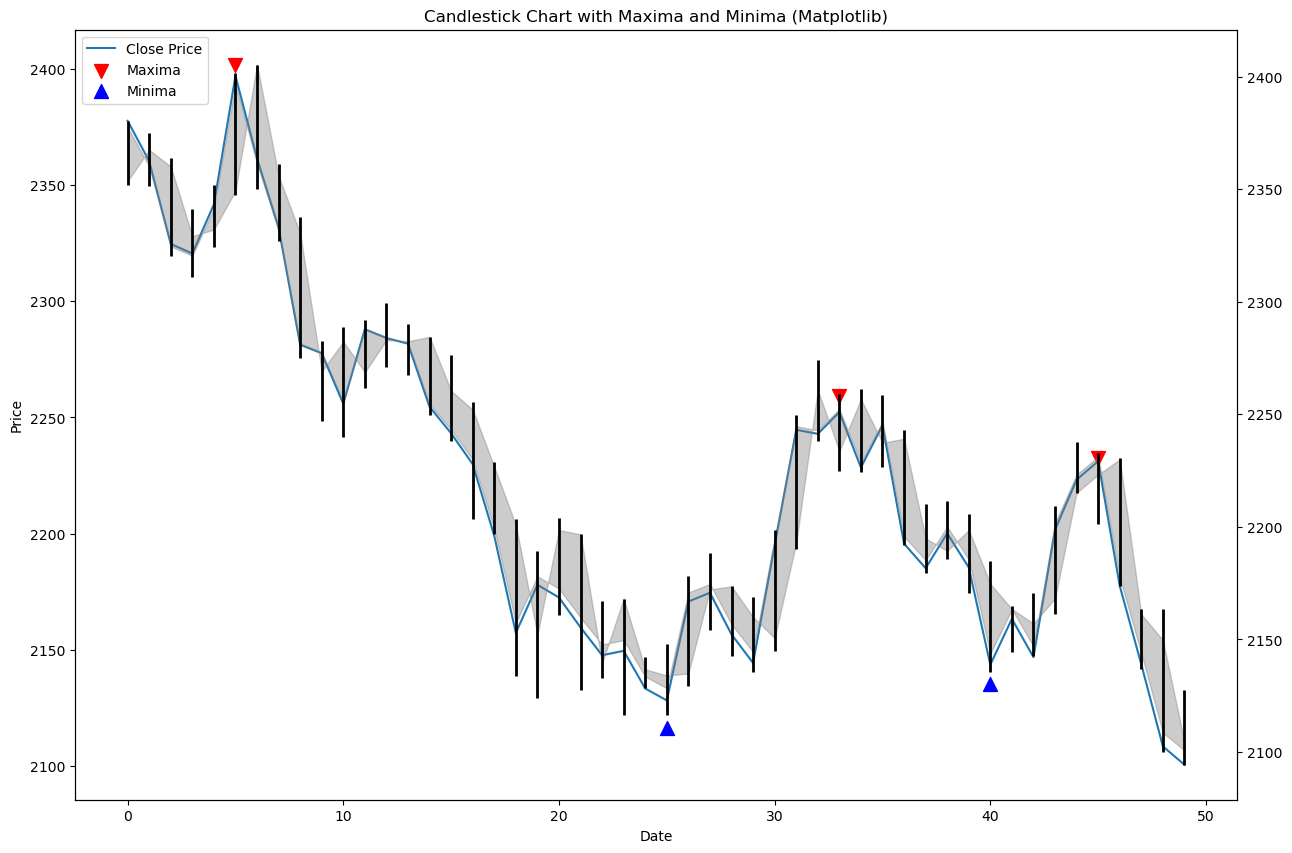

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Load data from CSV
data = pd.read_csv("D_RELIANCE1.csv")
data = data.iloc[:50, :]

# Rename columns and set index
# data.rename(columns={"Datetime": "Date"}, inplace=True)
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# Find local maxima and minima
max_idx = argrelextrema(data['Close'].values, np.greater, order=5)[0]
min_idx = argrelextrema(data['Close'].values, np.less, order=5)[0]

# Create candlestick chart
fig, ax = plt.subplots(figsize=(15, 10))  # Increased figure height to 10
ax.plot(data.index, data['Close'], label='Close Price', zorder=0)
ax.scatter(data.iloc[max_idx].index, data.iloc[max_idx]['High'],
           label='Maxima', s=100, color='red', marker='v')
ax.scatter(data.iloc[min_idx].index, data.iloc[min_idx]['Low'],
           label='Minima', s=100, color='blue', marker='^')

# Add candlestick plot
ax2 = ax.twinx()
ax2.fill_between(data.index, data['Open'], data['Close'], color='gray', alpha=0.4)
ax2.vlines(data.index, data['Low'], data['High'], color='black', lw=2)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')
ax.set_title('Candlestick Chart with Maxima and Minima (Matplotlib)')

fig.show()


In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

# Example features (you may need to adjust and add more features)
features = data[['Open', 'High', 'Low', 'Close']]

# Example labels (assuming you've already defined pivot labels)
labels = np.zeros(len(data))  # Initialize with non-pivot labels
labels[max_idx] = 1  # Set labels for pivot highs
labels[min_idx] = -1  # Set labels for pivot lows

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
}
# "linear Regrasion":LinearRegression()
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    print(f"{name} Model")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("R2_score :",r2_score(y_test,y_pred))
    # print("Classification Report:")
    # print(classification_report(y_test, y_pred))
    # print("\n")


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Random Forest Model
Accuracy: 0.8
R2_score : 0.0
[ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
Logistic Regression Model
Accuracy: 0.7
R2_score : -0.5
[ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
SVM Model
Accuracy: 0.7
R2_score : -0.5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Gradient Boosting Model
Accuracy: 0.8
R2_score : 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
K-Nearest Neighbors Model
Accuracy: 0.8
R2_score : 0.0


In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,r2_score

# Sample data preparation (assuming 'data' is a DataFrame with necessary columns)
# Features might include prices and technical indicators
features = data[['Open', 'High', 'Low', 'Close']]

# Labels for pivot points (1 for pivot high, -1 for pivot low, 0 for others)
labels = np.zeros(len(data))
labels[max_idx] = 1  # Replace with actual pivot high indices
labels[min_idx] = -1  # Replace with actual pivot low indices

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 Score:", r2)

# print(y_test,y_pred)

Random Forest Classifier
Accuracy: 0.8670520231213873
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         8
         0.0       0.88      0.98      0.93       153
         1.0       0.00      0.00      0.00        12

    accuracy                           0.87       173
   macro avg       0.29      0.33      0.31       173
weighted avg       0.78      0.87      0.82       173

R2 Score: -0.1553426248548202


E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


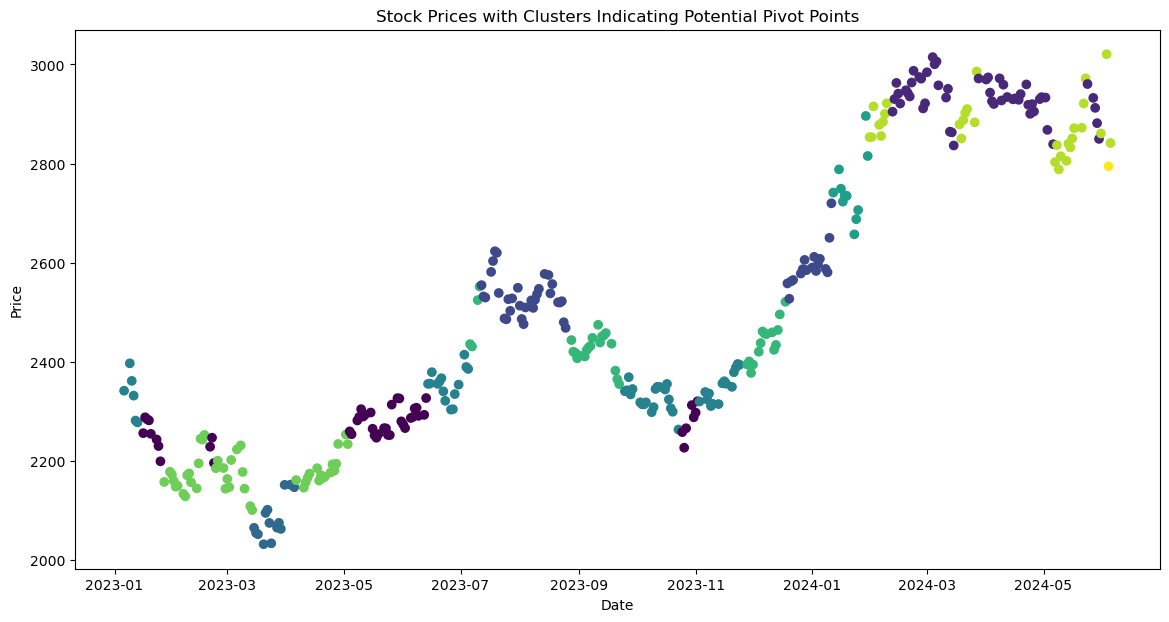

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load historical price data
data = pd.read_csv('D_RELIANCE1.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate features (example: 5-day moving average and price change)
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['Price_Change'] = data['Close'].diff()

# Drop NaN values
data.dropna(inplace=True)

# Prepare feature matrix
X = data[['MA_5', 'Price_Change']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['Close'], c=data['Cluster'], cmap='viridis')
plt.title('Stock Prices with Clusters Indicating Potential Pivot Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


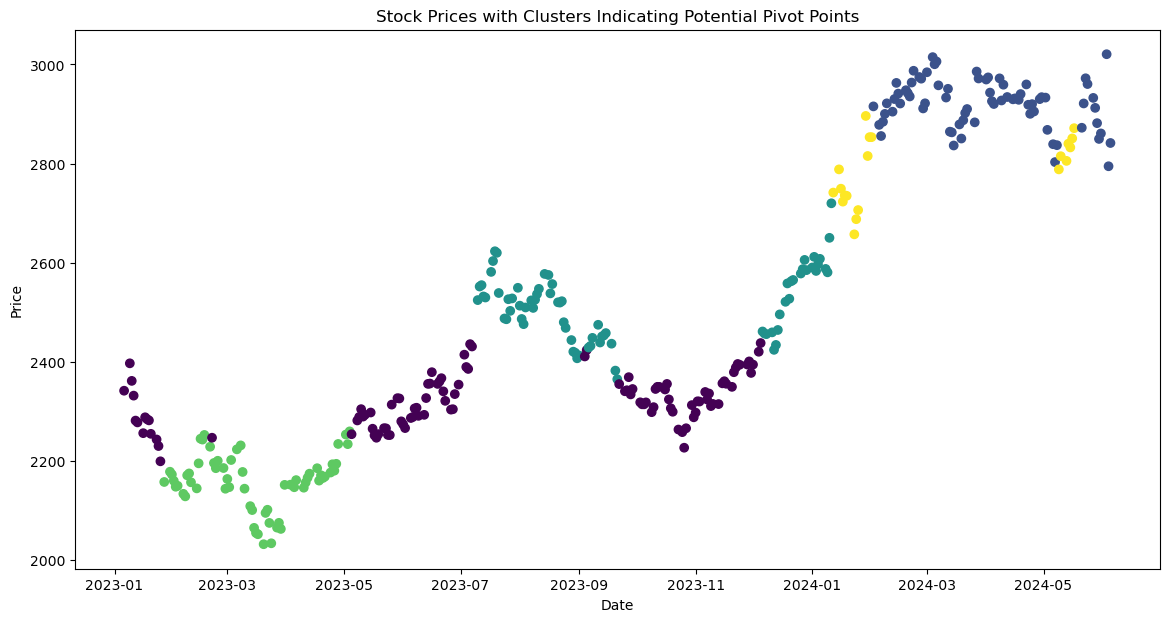

Random Forest Classifier
Accuracy: 0.8285714285714286
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         0.0       0.83      1.00      0.91        29
         1.0       0.00      0.00      0.00         4

    accuracy                           0.83        35
   macro avg       0.28      0.33      0.30        35
weighted avg       0.69      0.83      0.75        35

R2 Score: -0.01941747572815533
[ 0.  0.  0.  0.  0.  1.  1.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load historical price data
data = pd.read_csv('D_RELIANCE1.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.iloc[:500]

# Calculate features (example: 5-day moving average and price change)
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['Price_Change'] = data['Close'].diff()

# Drop NaN values
data.dropna(inplace=True)

# Prepare feature matrix for clustering
X_clustering = data[['MA_5', 'Price_Change']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_clustering)

# Plot clusters
plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['Close'], c=data['Cluster'], cmap='viridis')
plt.title('Stock Prices with Clusters Indicating Potential Pivot Points')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Prepare features for classification (including cluster labels)
features = data[['Open', 'High', 'Low', 'Close', 'Cluster']]

max_idx = argrelextrema(data['Close'].values, np.greater, order=5)[0]
min_idx = argrelextrema(data['Close'].values, np.less, order=5)[0]

# Labels for pivot points (1 for pivot high, -1 for pivot low, 0 for others)
labels = np.zeros(len(data))
labels[max_idx] = 1
labels[min_idx] = -1

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

print(y_test, y_pred)


In [46]:
# labs